In [101]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as const

In [102]:
# define a function to calculate the magnetic field due to a dipole
def B_dipole(r, r0, m):
    # r is a 3-vector
    # r0 is the position of the dipole
    # m is the dipole moment
    # returns a 3-vector
    r = np.array(r)
    r0 = np.array(r0)
    m = np.array(m)
    r = r - r0
    r_mag = np.linalg.norm(r)
    r_hat = r/r_mag
    B = 3*np.dot(m, r_hat)*r_hat/4/np.pi/const.epsilon_0/r_mag**3 - m/4/np.pi/const.epsilon_0/r_mag**3
    return B



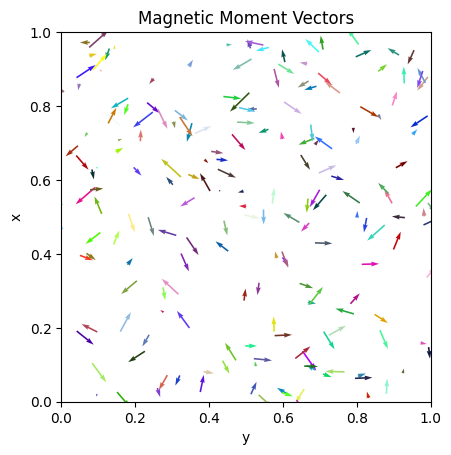

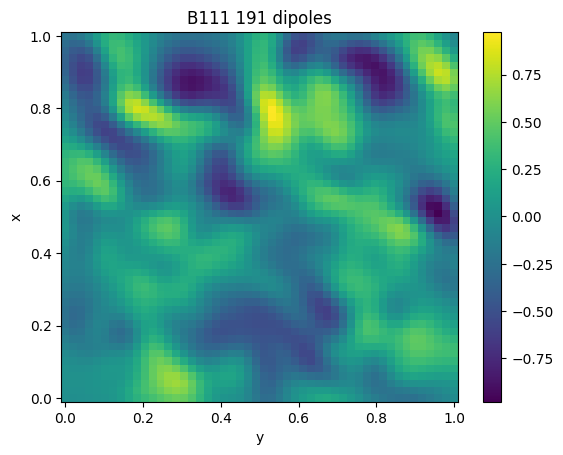

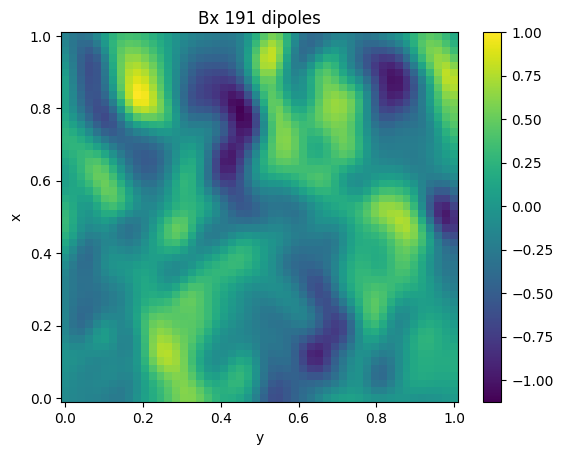

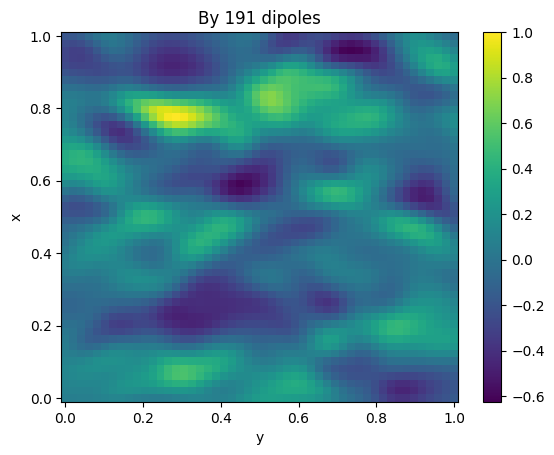

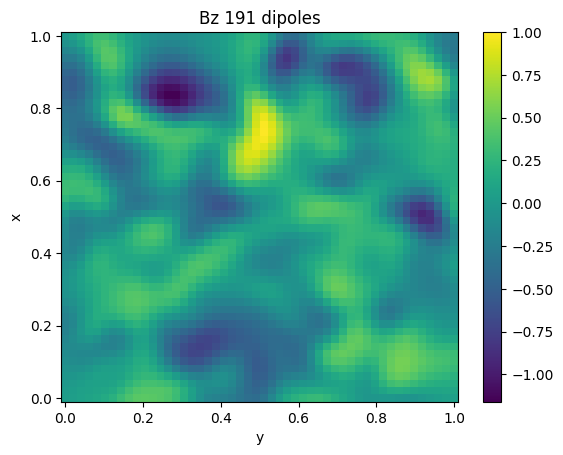

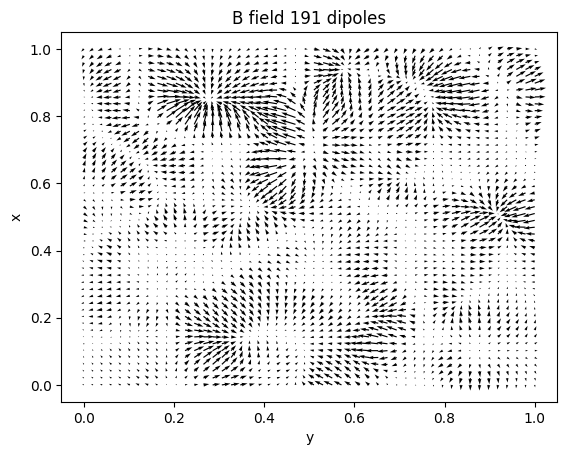

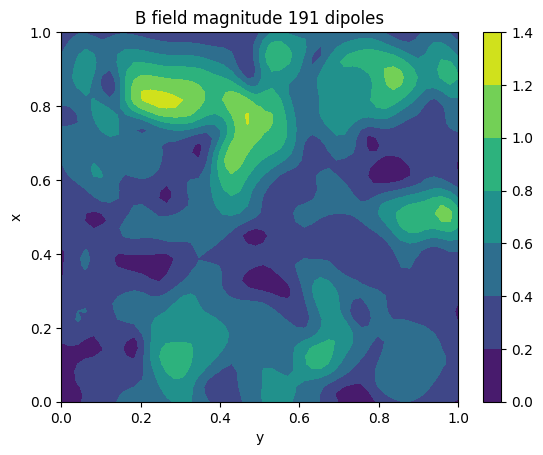

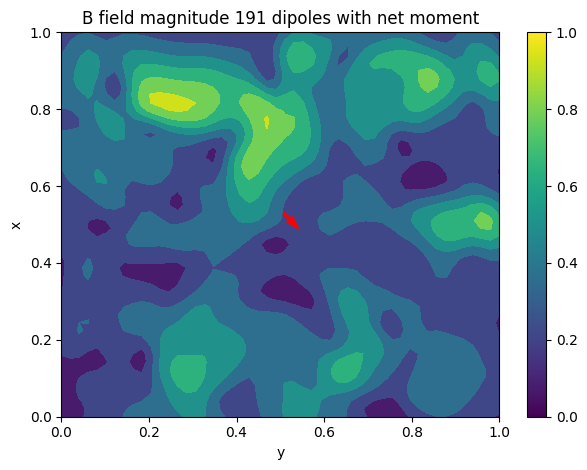

In [122]:
# Constants for magnetic moment
# mu_0 = const.mu_0
N = 191
scale = 50

# generate N random magnetic moment vectors between -1 and 1

mu = np.random.rand(N, 2)*2 - 1
# add a zero to z component
mu = np.hstack((mu, np.zeros((N, 1))))

# give random x y coordinates to the N vectors
x = np.random.rand(N)
y = np.random.rand(N)
z = np.zeros(N)

#make a position matrix 
pos = np.vstack((x, y, z)).T

#generate various colors withour black and white
colors = np.random.rand(N, 3)

#plot the vectors as they appear in the x y plane between 0 and 1
fig = plt.figure()
ax = fig.add_subplot(111)
ax.quiver(x, y, mu[:, 0], mu[:, 1], color=colors, scale_units='xy', angles='xy')
ax.set_xlabel('y')
ax.set_ylabel('x')
#add title
ax.set_title('Magnetic Moment Vectors')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
plt.show()


# plt.quiver(x, y, mu[:, 0], mu[:, 1], color=colors)
# plt.xlabel('x')
# plt.ylabel('y')
# plt.show()

# define the x y plane
x = np.linspace(0, 1, scale)
y = np.linspace(0, 1, scale)
X, Y = np.meshgrid(x, y)

#calculate net magnetic dipole moment
mu_net = np.sum(mu, axis=0)

#position of net magnetic dipole moment
pos_net = np.sum(pos, axis=0)/N

#define height off map
z = 0.1

#calculate the x component of the magnetic field due to each vector
Bx = np.zeros((scale, scale))
for j in range(scale):
    for k in range(scale):
        for i in range(N):
            Bx[j, k] += B_dipole([x[j], y[k], z], pos[i, :], mu[i, :])[0]


#calculate the y component of the magnetic field due to each vector
By = np.zeros((scale, scale))
for j in range(scale):
    for k in range(scale):
        for i in range(N):
            By[j, k] += B_dipole([x[j], y[k], z], pos[i, :], mu[i, :])[1]

#calculate the z component of the magnetic field due to each vector
Bz = np.zeros((scale, scale))
for j in range(scale):
    for k in range(scale):
        for i in range(N):
            Bz[j, k] += B_dipole([x[j], y[k], z], pos[i, :], mu[i, :])[2]

#scale magnetic fields to 1
Bx = Bx/np.max(Bx)
By = By/np.max(By)
Bz = Bz/np.max(Bz)


#take the 111 component of each magnetic field component
#111 normal vector
n = np.array([1, 1, 1])
n = n/np.linalg.norm(n)
B0 = Bx*n[0] + By*n[1] + Bz*n[2]

#plot the magnetic field in the 111 direction
fig7 = plt.figure()
plt.pcolormesh(Y,X,B0)
plt.colorbar()
plt.xlabel('y')
plt.ylabel('x')
plt.title('B111 '+str(N)+' dipoles')
plt.show()






# plot the x component of the magnetic field
fig1 = plt.figure()
plt.pcolormesh(Y, X, Bx)
plt.xlabel('y')
plt.ylabel('x')
#add title with number of vectors
plt.title('Bx '+str(N)+' dipoles')
plt.colorbar()
#set this plot to a variable
# ax = plt.gca()
plt.show()



# plot the y component of the magnetic field
fig2 = plt.figure()
plt.pcolormesh(Y, X, By)
plt.xlabel('y')
plt.ylabel('x')
plt.title('By '+str(N)+' dipoles')
plt.colorbar()
#set this plot to a new variable
# ay = plt.gca()
plt.show()

# plot the z component of the magnetic field
fig5 = plt.figure()
plt.pcolormesh(Y, X, Bz)
plt.xlabel('y')
plt.ylabel('x')
plt.title('Bz '+str(N)+' dipoles')
plt.colorbar()
#set this plot to a new variable
plt.show()


#make a 2d vector field 
fig3 = plt.figure()
plt.quiver(Y, X, Bx, By)
plt.xlabel('y')
plt.ylabel('x')
plt.title('B field '+str(N)+' dipoles')
#set this plot to a new variable
plt.show()


#plot a contour map of the magnitude of the magnetic field
fig4 = plt.figure()
plt.contourf(Y, X, np.sqrt(Bx**2 + By**2+Bz**2))
plt.xlabel('y')
plt.ylabel('x')
plt.title('B field magnitude '+str(N)+' dipoles')
plt.colorbar()
#set this plot to a new variable
plt.show()



#plot a contour map of the magnitude of the magnetic field with net magnetic moment vector
fig6 = plt.figure()
#display both the contour map and the net magnetic moment vector
plt.contourf(Y, X, np.sqrt(Bx**2 + By**2+Bz**2))
plt.quiver(pos_net[0], pos_net[1], mu_net[0], mu_net[1], color='r', angles='xy')
plt.xlabel('y')
plt.ylabel('x')
plt.title('B field magnitude '+str(N)+' dipoles with net moment')
#fit title to plot
plt.tight_layout()
plt.colorbar()
#set this plot to a new variable
plt.show()

In [121]:
fig1.savefig('BX ' + str(N) + '.png')
fig2.savefig('BY ' + str(N) + '.png')
fig3.savefig('B ' + str(N) + '.png')
fig4.savefig('Bmag ' + str(N) + '.png')
fig5.savefig('BZ ' + str(N) + '.png')
fig6.savefig('Bmag_net ' + str(N) + '.png')
fig7.savefig('B111 ' + str(N) + '.png')